#Cálculo de la curva de Gamow

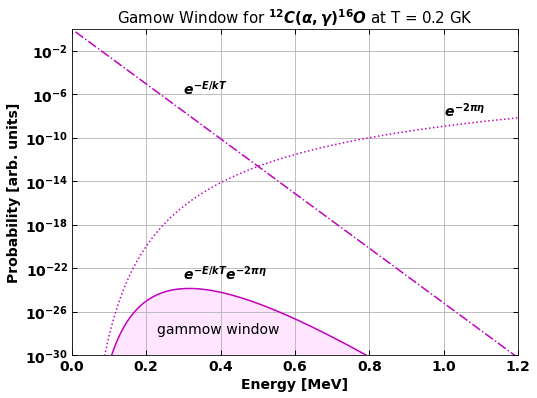

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 14}

mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1
mpl.rc('font', **font)

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

# Constantes
z0 = 2 
z1 = 6
m0 = 4 # [u]
m1 = 12 # [u]
mass = (m0 * m1) / (m0 + m1) # masa reducidad del sistema
t_9 = 0.2 # Temperatura en GK
k_t = 0.086173324 * t_9 # [MeV] (ec 3.74 Iliadis)

# (ec 3.75 Iliadis)

def gamow_factor(e):
  return np.exp(-0.98951013 * z0 * z1 * np.sqrt(mass / e))
	
def mb(e):
  return np.exp(-e / k_t)

def gamow_windows(e):
  return mb(e) * gamow_factor(e)
	
e = np.linspace(0.01,100,100000)

fig, ax = plt.subplots(1,1,figsize=(8, 6)) 

ax.semilogy(e, gamow_factor(e),'m:', lw=1.5 ,label=r'gamow factor')
ax.semilogy(e, mb(e),'m-.', lw=1.5 ,label=r'maxwell-boltzman')
ax.semilogy(e, gamow_windows(e),'m-', lw=1.5 ,label=r'gamow window')
ax.fill_between(e, gamow_windows(e), color='magenta', alpha=0.1)

ax.set_xlim([0, 1.2])
ax.set_ylim([10 ** (-30), 10 ** 0])
#ax.legend(loc=0, prop={'size': 12})
ax.set_xlabel('Energy [MeV]',family='sans-serif', size=14, fontweight='bold')
ax.set_ylabel('Probability [arb. units]',family='sans-serif', size=14, fontweight='bold')
ax.set_title(r'Gamow Window for $^{12}C(\alpha,\gamma)^{16}O$ at T = 0.2 GK',size=15, fontweight='regular')

ax.annotate('$e^{-E/kT}$', xy=(0.3, 10 ** -6), fontweight='regular')
ax.annotate('$e^{-2\pi\eta}$', xy=(1.0, 10 ** -8), fontweight='regular')
ax.annotate('$e^{-E/kT}e^{-2\pi\eta}$', xy=(0.3, 10 ** -23), fontweight='regular')
ax.annotate('gammow window', xy=(0.23, 10 ** -28), fontweight='regular')
plt.grid()

#plt.savefig("gamow.png", dpi=150)
plt.show()
 
 


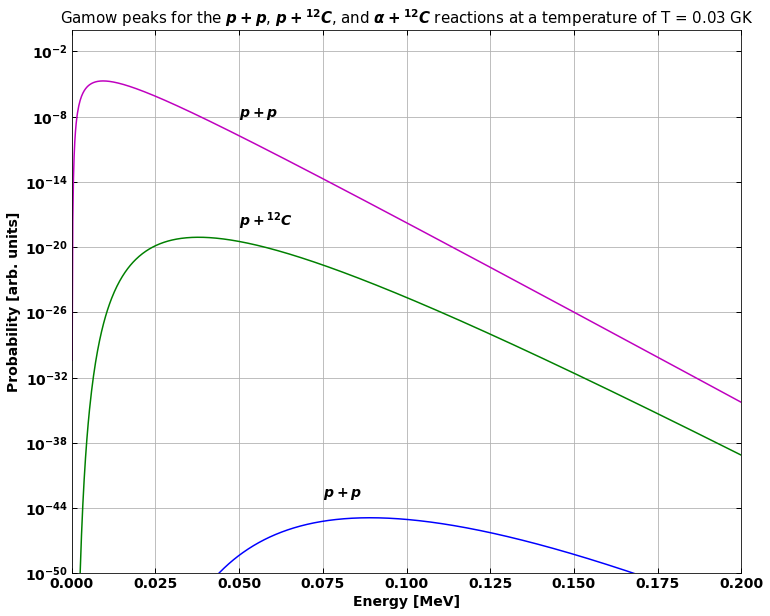

In [65]:
# Constantes
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 14}

mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1
mpl.rc('font', **font)

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

# Constantes
z0 = 1 
z1 = 1
m0 = 1 # [u]
m1 = 1 # [u]
mass = (m0 * m1) / (m0 + m1) # masa reducidad del sistema
mass1 = (1 * 12) / (1 + 12) # masa reducidad del sistema
mass2 = (4 * 12) / (4 + 12) # masa reducidad del sistema
t_9 = 0.03 # Temperatura en GK
k_t = 0.086173324 * t_9 # [MeV] (ec 3.74 Iliadis)

# (ec 3.75 Iliadis)

def mb(e):
  return np.exp(-e / k_t)

def gamow_factor(e):
  return np.exp(-0.98951013 * z0 * z1 * np.sqrt(mass / e))

def gamow_factor_pc(e):
  return np.exp(-0.98951013 * 1 * 6 * np.sqrt(mass1 / e))

def gamow_factor_ac(e):
  return np.exp(-0.98951013 * 2 * 6 * np.sqrt(mass2 / e))
	

def gamow_windows(e):
  return mb(e) * gamow_factor(e)

def gamow_windows_pc(e):
  return mb(e) * gamow_factor_pc(e)

def gamow_windows_ac(e):
  return mb(e) * gamow_factor_ac(e)
	
e = np.linspace(0.0001,20,100000)

fig, ax = plt.subplots(1,1,figsize=(12, 10)) 


ax.semilogy(e, gamow_windows(e),'m-', lw=1.5 ,label=r'gamow window')
ax.semilogy(e, gamow_windows_pc(e),'g-', lw=1.5 ,label=r'gamow window')
ax.semilogy(e, gamow_windows_ac(e),'b-', lw=1.5 ,label=r'gamow window')

#ax.fill_between(e, gamow_windows(e), color='magenta', alpha=0.1)

ax.set_xlim([0., 0.2])
ax.set_ylim([10 ** (-50), 10 ** 0])
#ax.legend(loc=0, prop={'size': 12})
ax.set_xlabel('Energy [MeV]',family='sans-serif', size=14, fontweight='bold')
ax.set_ylabel('Probability [arb. units]',family='sans-serif', size=14, fontweight='bold')
ax.set_title(r'Gamow peaks for the $p + p$, $p + ^{12}C$, and $\alpha + ^{12}C$ reactions at a temperature of T = 0.03 GK',size=15, fontweight='regular')

#ax.annotate('$e^{-E/kT}$', xy=(0.3, 10 ** -6), fontweight='regular')
#ax.annotate('$e^{-2\pi\eta}$', xy=(1.0, 10 ** -8), fontweight='regular')
ax.annotate(r'$p + p$', xy=(0.05, 10 ** -8), fontweight='regular')
ax.annotate(r'$p + ^{12}C$', xy=(0.05, 10 ** -18), fontweight='regular')
ax.annotate(r'$p + p$', xy=(0.075, 10 ** -43), fontweight='regular')
#ax.annotate('gammow window', xy=(0.23, 10 ** -28), fontweight='regular')
plt.grid()

#plt.savefig("gamow.png", dpi=150)
plt.show()
 

Maximo de Energia:  [0.00950005]
Maximo Y:  1.9349555310210024e-05
Maximo de Energia:  0.01 MeV


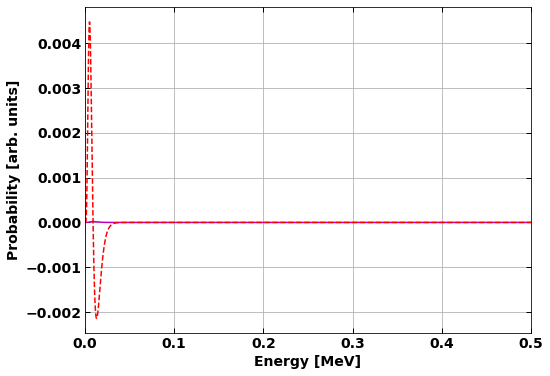

In [67]:

dydx = np.gradient(gamow_windows(e), e)
print ("Maximo de Energia: ", e[1:][dydx[1:] * dydx[:-1] < 0])

max = gamow_windows(e).max()
print("Maximo Y: ", max)
print("Maximo de Energia: ", round(e[gamow_windows(e).argmax()],2),"MeV")


fig, ax = plt.subplots(1,1,figsize=(8, 6)) 
ax.plot(e, gamow_windows(e),'m-', lw=1.5 ,label=r'gamow window')
ax.plot(e, dydx,'r--', lw=1.5 ,label=r'derivada')
ax.set_xlim([0, 0.5])
#ax.set_ylim([0, 2.0 * 10 ** (-24)])
ax.set_xlabel('Energy [MeV]',family='sans-serif', size=14, fontweight='bold')
ax.set_ylabel('Probability [arb. units]',family='sans-serif', size=14, fontweight='bold')

plt.grid()

# Energía óptima

In [8]:
import sympy as sy
import sympy.physics.units as units

hbar = 6.582119514 * 10 ** (-22) # MeV.s
pi = 3.1415
z0 = 2.0 
z1 = 6.0
m0 = 4.0 # [u]
m1 = 12.0 # [u]
mass = (m0 * m1) / (m0 + m1) # masa reducidad del sistema
t_9 = 0.2 # Temperatura en GK
k_t = 0.086173324 * t_9 # [MeV] (ec 3.74 Iliadis)

In [3]:
x = symbols('x')
y = -2 * sy.pi / hbar * sy.sqrt(mass / (2 * x)) * z0 * z1     # ec 3.76 Iliadis
dy = diff(y)
print(dy)
sol = solve(dy)
print(sol)

NameError: name 'symbols' is not defined